# Mahsa Aghazadeh 20234622

## HSS407 Individual Lab 2
### Sampling distribution and inferential statistics

- In this lab, we will practice to understand how sampling distribution works step-by-step.
- Let's say our population size is 10k and we measure the height of KAIST students.
- The proportion of man is very high in KAIST, which will make the height distribution bimodal.

Let's create a hypothetical KAIST students height distribution.


In [ ]:
import numpy as np

kaist_pop = np.concatenate([np.random.normal(175, 3, 8000), np.random.normal(160, 3, 2000)])

### Question 1
Check its distribution using a histogram and describe its shape.


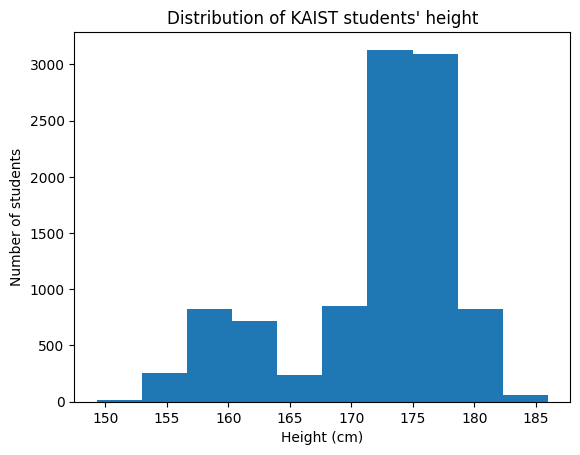

In [ ]:
import matplotlib.pyplot as plt

plt.hist(kaist_pop)
plt.xlabel("Height (cm)")
plt.ylabel("Number of students")
plt.title("Distribution of KAIST students' height")
plt.show()


The distribution is bimodal, with two peaks at around 160 cm and 175 cm. This is because the population is composed of two distinct groups: men and women. Men are typically taller than women, so the distribution of their heights is shifted to the right. Women are typically shorter than men, so the distribution of their heights is shifted to the left.


---

### Question 2
Check the population mean and standard deviation.

In [ ]:
import numpy as np
mean = np.mean(kaist_pop)
std = np.std(kaist_pop)

print(f"Population mean: {mean:.2f} cm")
print(f"Population standard deviation: {std:.2f} cm")


Population mean: 171.98 cm
Population standard deviation: 6.71 cm


---

Now, sample 100 students randomly from the population.


In [ ]:
np.random.seed(42)  # To ensure reproducibility
sample = np.random.choice(kaist_pop, 100, replace=False)

### Question 3
Again, check its distribution using a histogram, and compute mean and sd, then compare them to your population distribution.


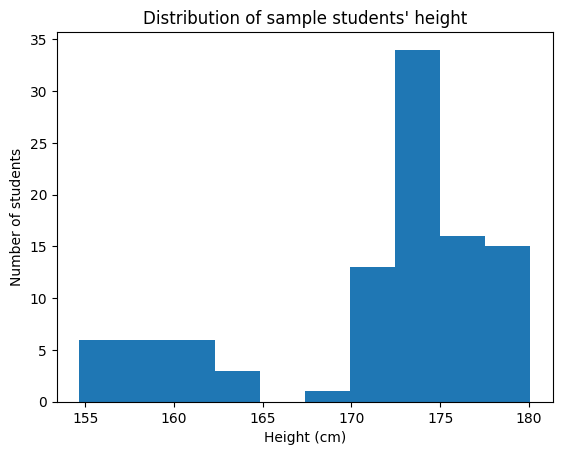

Sample mean: 171.49 cm
Sample standard deviation: 6.80 cm


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(sample)
plt.xlabel("Height (cm)")
plt.ylabel("Number of students")
plt.title("Distribution of sample students' height")
plt.show()

mean_sample = np.mean(sample)
std_sample = np.std(sample)

print(f"Sample mean: {mean_sample:.2f} cm")
print(f"Sample standard deviation: {std_sample:.2f} cm")

The distribution of the sample is similar to the distribution of the population. However it seems like the sample distribution has more fluctuations and less smoothness compared to the population distribution, which is expected with smaller sample sizes.

Mean and standard deviation is pretty close to the population's mean and standard deviation but yet not precise which shows single sample cannot represent the whole population but may give us a overal veiw

---

Now, let's repeat the same procedure for 1,000 times, and save their average.

In [ ]:
sampling_distribution_n100 = []

for i in range(1000):
    sample_mean = np.mean(np.random.choice(kaist_pop, 100, replace=False))
    sampling_distribution_n100.append(sample_mean)

### Question 4
Check the distribution of sampling distribution by using a histogram, and compute a mean and sd.

(continued) Describe the shape of distribution and compare it to the distribution from population. Do they look similar or not, and why?

(continued) Describe the mean and standard deviation. Is it similar to population mean and standard deviation?

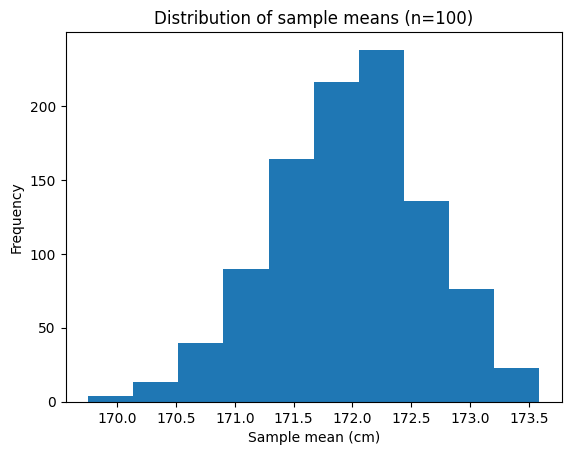

Mean of sampling distribution: 171.98 cm
Standard deviation of sampling distribution: 0.65 cm


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(sampling_distribution_n100)
plt.xlabel("Sample mean (cm)")
plt.ylabel("Frequency")
plt.title("Distribution of sample means (n=100)")
plt.show()

mean_sampling_distribution = np.mean(sampling_distribution_n100)
std_sampling_distribution = np.std(sampling_distribution_n100)

print(f"Mean of sampling distribution: {mean_sampling_distribution:.2f} cm")
print(f"Standard deviation of sampling distribution: {std_sampling_distribution:.2f} cm")


1. Following the Central Limit Theorem the distribution looks more like a normal distribution. But the distribution of the population is bimodal

 Central Limit Theorem states that the distribution of sample means will be approximately normal, regardless of the shape of the population distribution.


2. The mean of the sampling distribution is very close to the mean of the population. because the sample means are unbiased estimators of the population mean.\
 Standard deviation of the sampling distribution is smaller than the standard deviation of the population. This is because the sample means are less variable than the individual data points in the population.


---

## Confidence interval

Let's again sample with size 100.


In [ ]:
sample_n100 = np.random.choice(kaist_pop, 100, replace=False)

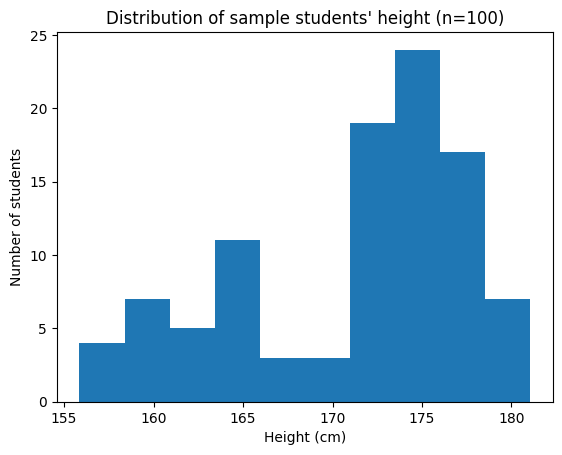

In [ ]:

plt.hist(sample_n100)
plt.xlabel("Height (cm)")
plt.ylabel("Number of students")
plt.title("Distribution of sample students' height (n=100)")
plt.show()


### Question 5
Compute the mean and standard 'error'. Then, compute the 95% confidence interval. Explain the meaning of the confidence interval in English sentences.

In [ ]:
mean = np.mean(sample_n100)

std_error = np.std(sample_n100, ddof=1) / np.sqrt(len(sample_n100))

ci = (mean - 1.96 * std_error, mean + 1.96 * std_error)

print(f"95% confidence interval: ({ci[0]:.2f}, {ci[1]:.2f})")

95% confidence interval: (169.72, 172.28)


The 95% confidence interval of (169.72, 172.28) means that we are 95% confident that the true mean of the population from which the sample was taken lies between 169.72 and 172.28.

---

### Question 6
Does your confidence interval cover the 'true' mean? What does that mean?


Yes it covers the true mean.

* The true mean of the population = 171.93 cm.
* Our confidence interval = (169.72, 172.28).

The true mean falls within our confidence interval. So we can say that the calculated interval from sample includes the true mean of the population. This suggests that our sample is likely a good representation of the population with respect to the mean.

---

Let's say that we randomly sample 30 POSTECH students and find out that their average height is 172.8. Let's assume that the variance of height is similar to KAIST students' height.


### Question 7
Does this sample support the argument that Postech students are statistically significantly taller than KAIST students?

Use the t-test results below and examine the above hypothesis and interpret the results.

In [ ]:
import scipy.stats as stats
t_stat, p_value = stats.ttest_1samp(sample_n100, 172.8)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -2.766039224887684, P-value: 0.006770619674762561


Null Hypothesis (H0​): The mean height of POSTECH students is equal to the mean height of KAIST students.

In this case, the p-value is 0.0068, which means the probability that observed sample mean would occure if the null hypothesis would be true
is 0.0068 which is really low. This indicates that there is strong evidence to reject the null hypothesis.

So POSTech students are either taller or shorter than KAIST.
since the T-statsitic is negative we can say that the sample mean (POSTECH students' height) is lower than the population mean (KAIST students' height).


---

# THE END #